# DESCRIPTIVE STATISTICS OF THE TRIBUNAL DECISIONS (20th November 2021)

This notebook extracts additional information from the text of the tribunal decisions and stores it in the relevant dictionary.

In particular, the notebook performs information extraction on:

1. The label included in the name of the file.

2. The court where the case was heard ("Heard at").

3. The judges.

4. The legal representation for the appellant and the respondent.

5. The decision/ruling by the judge.

Each of these filds is added to the dictionary of each judicial decision.

The resulting data set - a list of updated dictionaries -  is serialised as a json object (jsonDataFinal.json).

This notebook should run in the tfm environment, which can be created with the environment.yml file.

In [1]:
import ipykernel
from os import listdir
from os.path import isfile, join, getsize
import numpy as np
import time
import re
import json
import pickle
import pandas as pd
import sys
import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import sys
IN_COLAB = 'google.colab' in sys.modules


# What environment am I using?
print(f'Current environment: {sys.executable}')

# Change the current working directory
os.chdir('/Users/albertamurgopacheco/Documents/GitHub/TFM')
# What's my working directory?
print(f'Current working directory: {os.getcwd()}')


Current environment: /Users/albertamurgopacheco/anaconda3/envs/tfm/bin/python
Current working directory: /Users/albertamurgopacheco/Documents/GitHub/TFM


In [2]:
# Define working directories in colab and local execution

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    docs_path = '/content/gdrive/MyDrive/TFM/data/raw'
    input_path = '/content/gdrive/MyDrive/TFM'
    output_path = '/content/gdrive/MyDrive/TFM/output'

else:
    docs_path = './data/raw'
    input_path = '.'
    output_path = './output'

# DESCRIPTIVE STATISTICS OF THE TRIBUNAL DECISIONS

# 1. Build a dataframe with the required fields

First, create a dataframe with the fields included in jsonDataFinal.json.

In [3]:
# Open jsonData file as data
with open('./data/jsonDataFinal.json') as json_file:
    data = json.load(json_file)

# Create dataframe
df = pd.DataFrame(data)

Generate additional fields that will come handy. For example, year

In [4]:
# Based on promulgation date
df['year'] = df['Promulgation date:'].str[-4:]


In [5]:
# Fields in the database
df.keys()

Index(['Case title:', 'Appellant name:', 'Status of case:', 'Hearing date:',
       'Promulgation date:', 'Publication date:', 'Last updated on:',
       'Country:', 'Judges:', 'Document', 'Reference', 'Download', 'File',
       'String', 'ID', 'Code label:', 'Heard at:', 'Decision:', 'Nationality:',
       'Representation:', 'Appellant:', 'Respondent:', 'Decision label:',
       'Appellant entity:', 'Respondent entity:', 'Country code', 'Keywords',
       'Country guidance:', 'Case Notes:', 'Categories:', 'Heart at:', 'year'],
      dtype='object')

# 2. Descriptive statistics

Let's first get a sense of the number of rulings per year.

    year  counts
20  2001      15
12  2002     150
10  2003     265
9   2004     339
11  2005     180
14  2006      96
13  2007     101
16  2008      92
19  2009      54
18  2010      64
15  2011      93
17  2012      78
7   2013    1507
4   2014    4073
2   2015    4938
1   2016    5391
5   2017    3971
0   2018    5859
3   2019    4818
6   2020    1876
8   2021    1345


Text(0.5, 1.0, 'Court rulings per year')

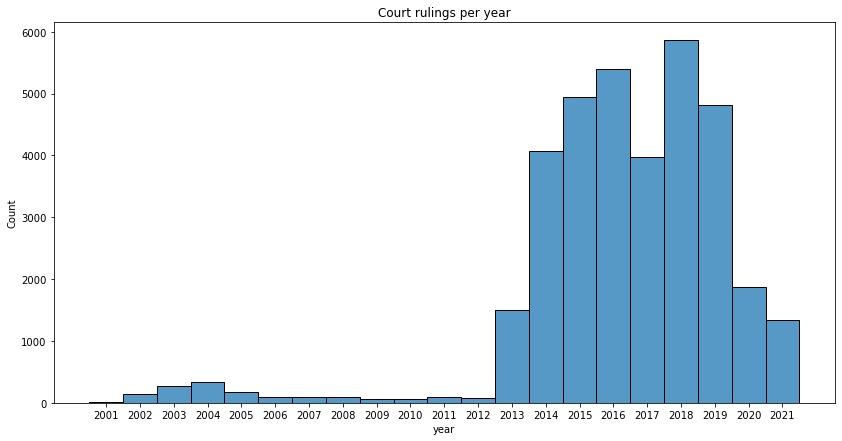

In [6]:
# Number of rulings per year
df_year = df['year'].value_counts().rename_axis('year').reset_index(name='counts').sort_values('year')
print(df_year)

# Plot the number of rulings per year
plt.figure(figsize=(14,7))
sns.histplot(data = df.sort_values('year'), x = 'year')
plt.title('Court rulings per year')

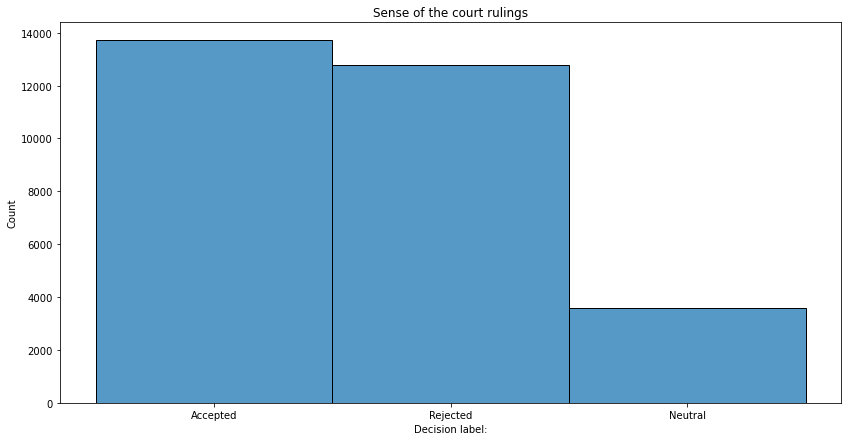

,Decision,counts
0,Accepted,13711
1,Rejected,12778
2,Neutral,3596


In [8]:
df_accepted = df['Decision label:'].value_counts().rename_axis('Decision').reset_index(name='counts')

# Plot the number of rulings per year
plt.figure(figsize=(14,7))
sns.histplot(data = df, x = 'Decision label:')
plt.title('Sense of the court rulings')
plt.show()

df_accepted


Text(0.5, 1.0, 'Court rulings per year')

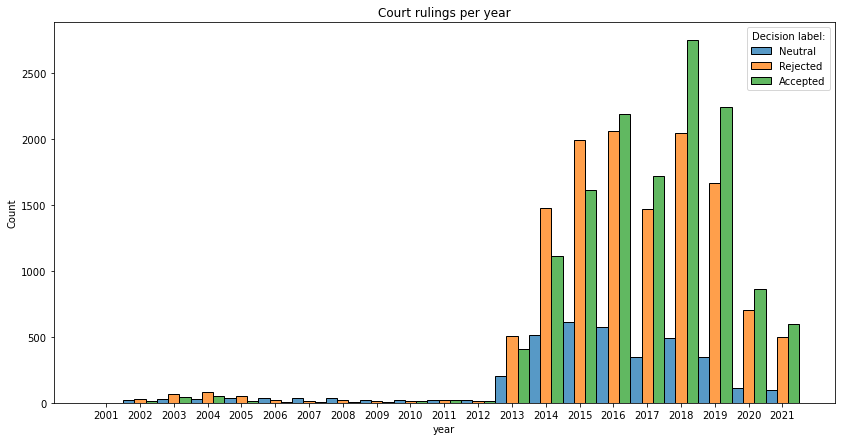

In [8]:
# Plot the number of rulings per year by sense of the ruling
plt.figure(figsize=(14,7))
sns.histplot(data = df.sort_values('year'), x = 'year', hue = 'Decision label:', multiple = 'dodge')
plt.title('Court rulings per year')

   Code  counts
0    IA    9193
1    PA    7314
2    HU    5895
3    AA    4108
4    OA    2203
5    NA    2140
6    DA    1688
7    EA    1687
8    VA     574
9    JR     210
10   RP     207
11   DC      73
12   LP       7
13   HX       2
14   OC       1
15   0A       1
16   AS       1
17   A0       1


Text(0.5, 1.0, 'Labels in court rulings')

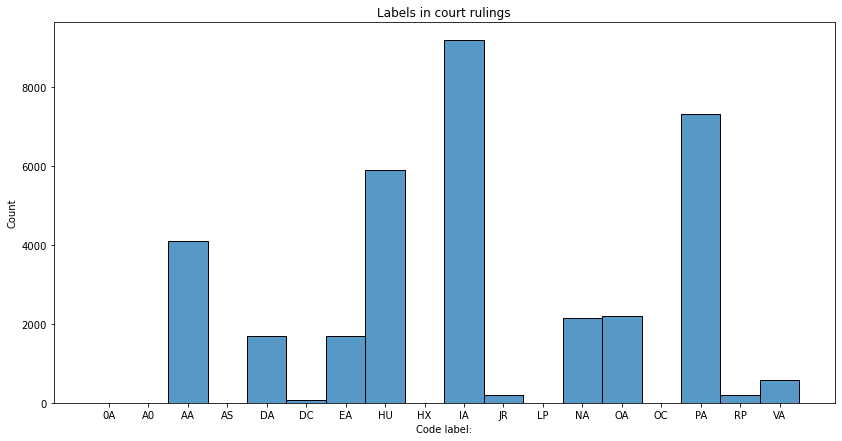

In [9]:


df_code = df['Code label:'].value_counts().rename_axis('Code').reset_index(name='counts')
print(df_code)
# Plot the number of rulings per year
plt.figure(figsize=(14,7))
sns.histplot(data = df.sort_values('Code label:'), x = 'Code label:')
plt.title('Labels in court rulings')

# Case status reported/unreported

In [10]:
df_status = df['Status of case:'].value_counts().rename_axis('Status').reset_index(name = 'counts')
print(df_status)

       Status  counts
0  Unreported   33165
1    Reported    2140


# The court

The vast majority of cases are heard at Field House in London.

                               Court  counts
0                Field House, London   20901
1                                 NA    3079
2    Manchester Civil Justice Centre    2074
3                           Bradford    1572
4                            Glasgow    1222
5    Birmingham Civil Justice Centre    1056
6            Columbus House, Newport     812
7      Centre City Tower, Birmingham     617
8                      North Shields     592
9      Bennett House, Stoke-on-Trent     497
10           Royal Courts of Justice     240
11                         Liverpool     223
12      Cardiff Civil Justice Centre     213
13             Manchester Piccadilly     210
14       The Royal Courts of Justice     156
15         Sheldon Court, Birmingham      75
16          Birmingham Sheldon Court      73
17                      Taylor House      60
18           George House, Edinburgh      31
19                           Belfast      27
20  Royal Courts of Justice, Belfast      21
21        

Text(0.5, 1.0, 'Court')

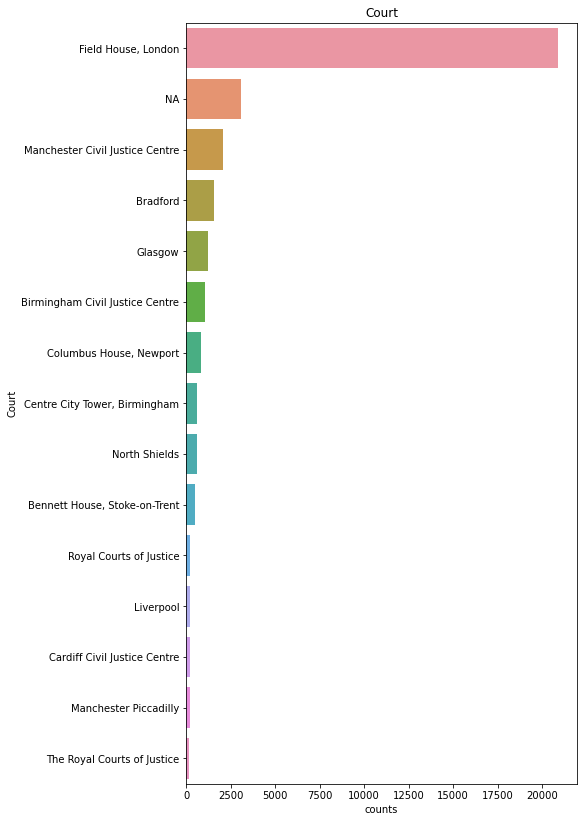

In [11]:
# Heard at
df_court = df['Heard at:'].value_counts().rename_axis('Court').reset_index(name = 'counts')
print(df_court.head(30))

# Plot the number of rulings per year
plt.figure(figsize=(7,14))
sns.barplot(data = df_court[:15], x = 'counts', y = 'Court')
plt.title('Court')

# Count complete sets (rulings with all relevant fields completed)

# Nationalities

Pakistan and Nigeria are the most common nationalities.

             Nationality  counts
0               Pakistan    3488
1                Nigeria    2191
2             Bangladesh    1673
3                  India    1580
4                   Iraq    1182
..                   ...     ...
280            Stateless       1
281                  Chl       1
282           Madagascar       1
283  Trinidad and tobago       1
284                 Chad       1

[285 rows x 2 columns]


Text(0.5, 1.0, 'Nationality')

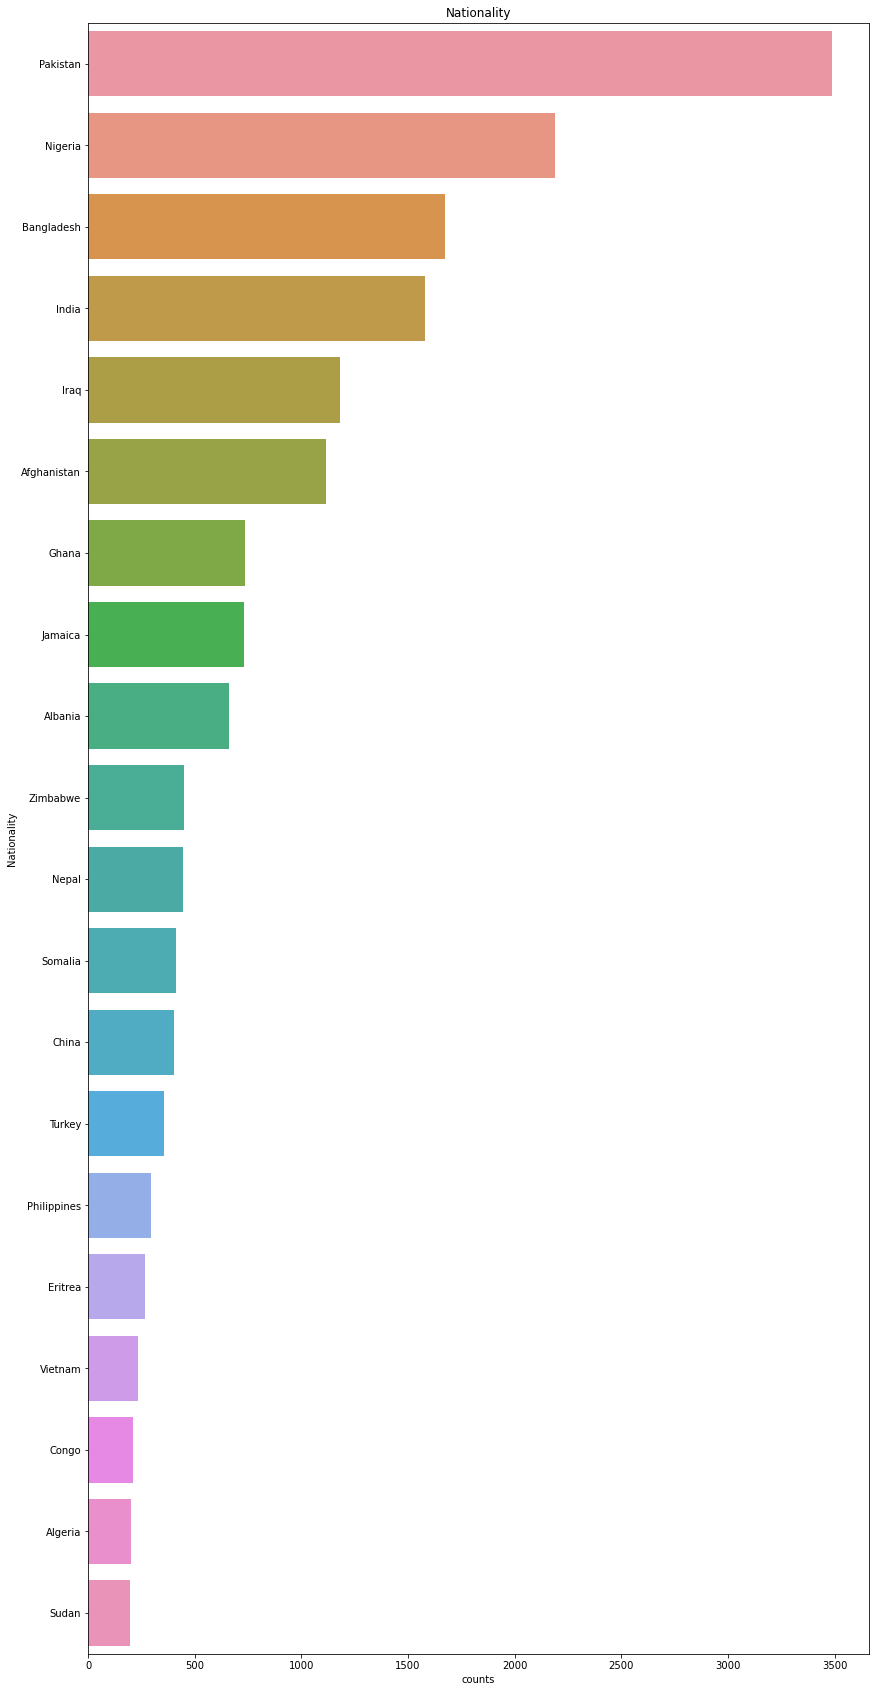

In [12]:

# Do it with 'Country code'
df_nationality = df['Nationality:'].value_counts().rename_axis('Nationality').reset_index(name='counts')
print(df_nationality)
# Plot the number of rulings per year
plt.figure(figsize=(14,30))
sns.barplot(data = df_nationality[:20], x = 'counts', y = 'Nationality')
plt.title('Nationality')

nationality pyramid

    Nationality: Decision label:  counts
0            Afg        Accepted      16
1            Afg         Neutral      20
2            Afg        Rejected      15
3    Afghanistan        Accepted     484
4    Afghanistan         Neutral      92
..           ...             ...     ...
633     Zimbabwe        Rejected     196
634          Zmb         Neutral       1
635          Zwe        Accepted       9
636          Zwe         Neutral       7
637          Zwe        Rejected      11

[638 rows x 3 columns]
    Nationality: Decision label:  counts
438     Pakistan        Rejected   -1505
418      Nigeria        Rejected    -883
48    Bangladesh        Rejected    -720
257        India        Rejected    -690
268         Iraq        Rejected    -454
..           ...             ...     ...
266         Iraq        Accepted     516
255        India        Accepted     553
46    Bangladesh        Accepted     607
416      Nigeria        Accepted     859
436     Pakistan        Accepted 

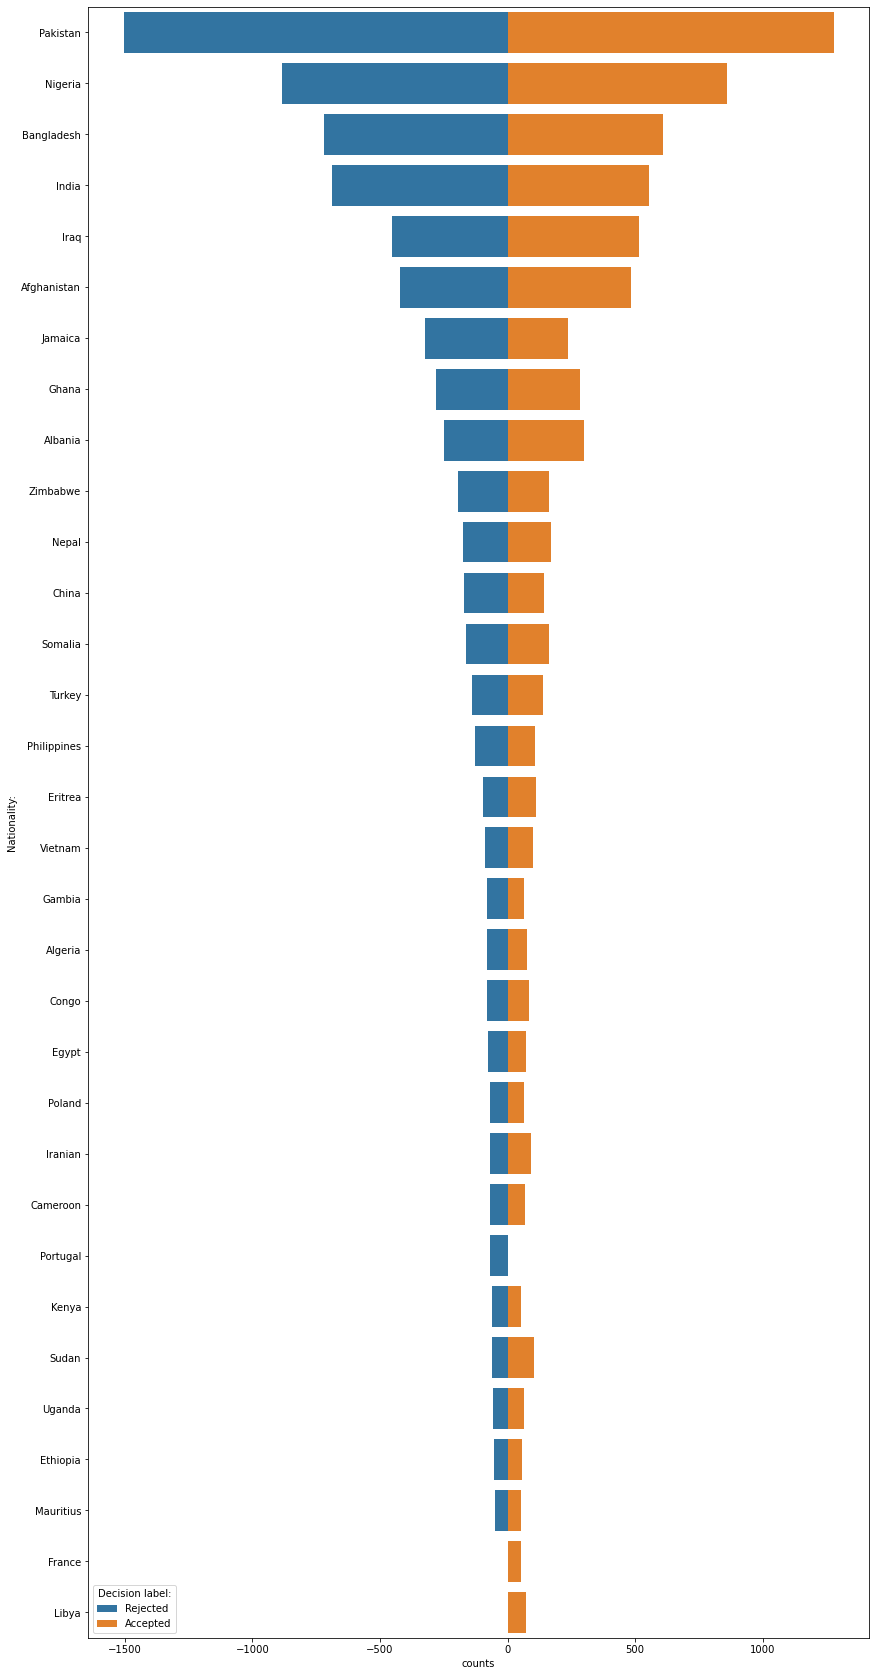

In [30]:
#df_country_pyramid = df['Nationality:'].value_counts().rename_axis('Nationality').reset_index(name='counts')
df_country_pyramid = df.groupby(['Nationality:', 'Decision label:']).size().reset_index(name='counts')
print(df_country_pyramid)

#df_country_pyramid.pivot(index='Nationality:', columns='Decision label:', values='counts')


#df = pd.pivot(index=df.group_id, columns=df.entity_id.str[-1], values=df.value).add_prefix('entity_').rename_axis(None, axis=1).reset_index()

df_country_pyramid = df_country_pyramid[df_country_pyramid['Decision label:'] != 'Neutral']
df_country_pyramid['counts'] = np.where(df_country_pyramid['Decision label:'] == 'Rejected', df_country_pyramid['counts'] * -1, df_country_pyramid['counts'])
df_country_pyramid = df_country_pyramid.sort_values(by=['counts'])
print(df_country_pyramid)

df_country_pyramid = df_country_pyramid[(df_country_pyramid['counts'] > 50) | (df_country_pyramid['counts'] < -50)]

plt.figure(figsize=(14,30))
sns.barplot(data = df_country_pyramid, x = 'counts', y = 'Nationality:', hue = 'Decision label:', orient = 'horizontal', dodge = False)
plt.savefig('./output/nationality_pyramid.png')
# Decorations



In [26]:
df_country_pyramid.sort_values('Nationality:')

,Nationality:,Decision label:,counts
5,Afghanistan,Rejected,-421
3,Afghanistan,Accepted,484
14,Albania,Rejected,-248
12,Albania,Accepted,298
15,Algeria,Accepted,74
...,...,...,...
592,Uganda,Accepted,65
616,Vietnam,Rejected,-90
614,Vietnam,Accepted,98
631,Zimbabwe,Accepted,164


Let's turn to the sense of the ruling by the nationality of the appealent/defendent.

   Nationality:  Accepted  Rejected  Accepted pc
27        Sudan     103.0     -61.0    62.804878
14      Iranian      93.0     -69.0    57.407407
1       Albania     298.0    -248.0    54.578755
8       Eritrea     113.0     -97.0    53.809524
0   Afghanistan     484.0    -421.0    53.480663
29       Uganda      65.0     -57.0    53.278689
15         Iraq     516.0    -454.0    53.195876
9      Ethiopia      58.0     -52.0    52.727273
30      Vietnam      98.0     -90.0    52.127660
6         Congo      83.0     -79.0    51.234568
28       Turkey     140.0    -139.0    50.179211
12        Ghana     283.0    -282.0    50.088496
26      Somalia     164.0    -164.0    50.000000
19    Mauritius      51.0     -51.0    50.000000
21      Nigeria     859.0    -883.0    49.311137
4      Cameroon      67.0     -69.0    49.264706
20        Nepal     169.0    -175.0    49.127907
24       Poland      65.0     -71.0    47.794118
7         Egypt      71.0     -78.0    47.651007
2       Algeria     

Text(0.5, 1.0, 'Percentage of accepted applications')

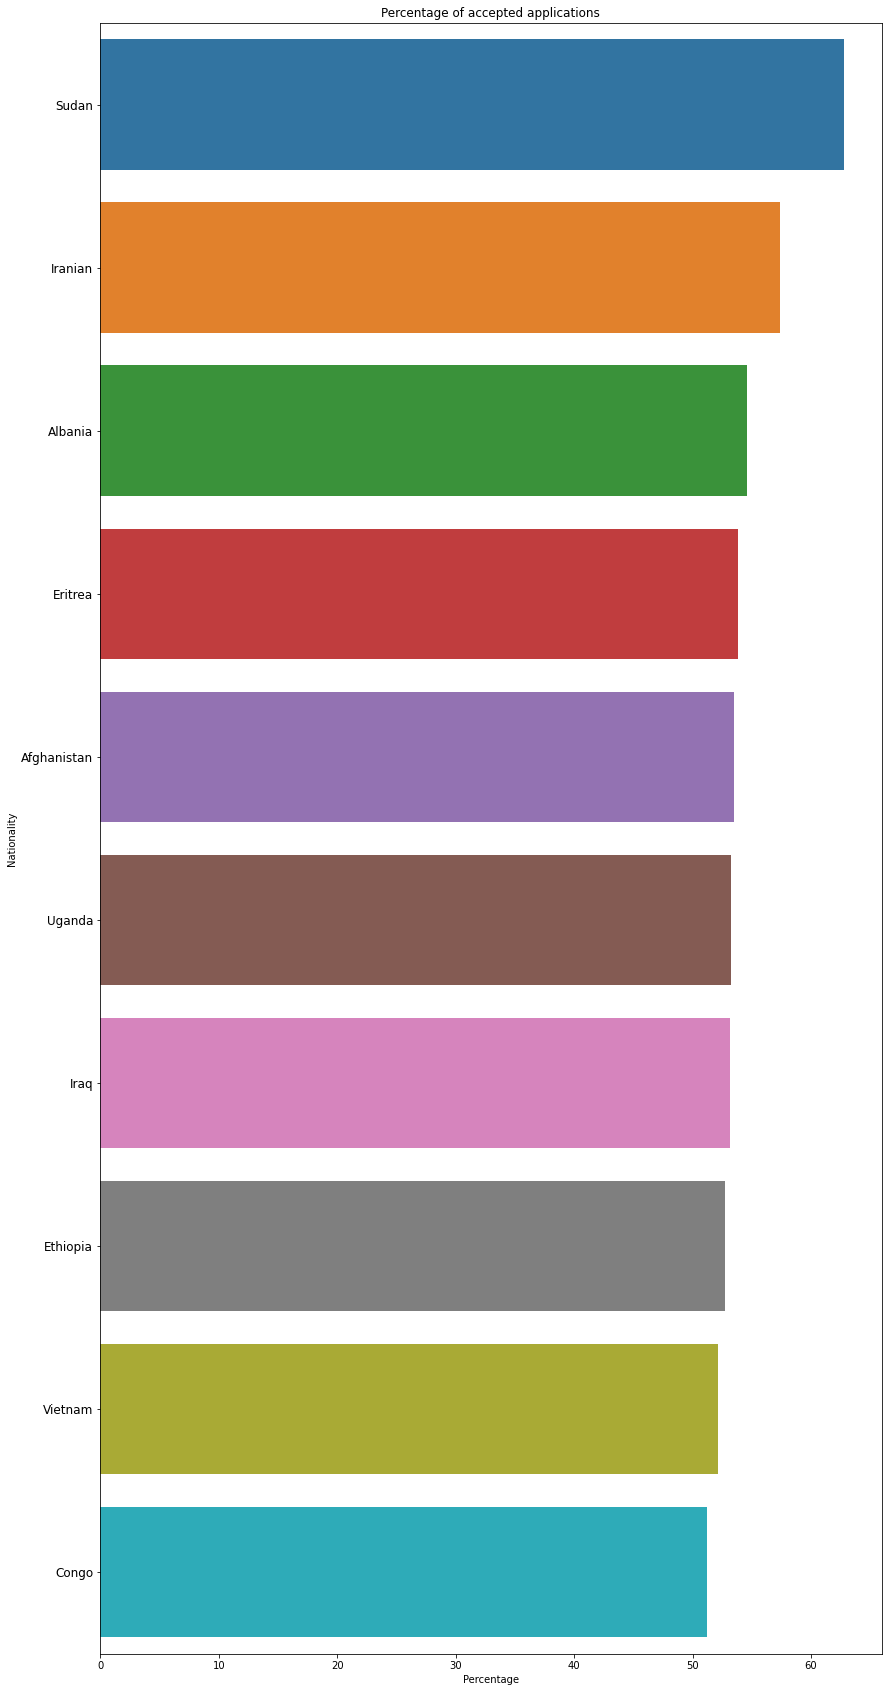

In [28]:
pivoted_df_country_pyramid = df_country_pyramid.pivot('Nationality:', 'Decision label:', 'counts').rename_axis(None, axis=1).reset_index()
pivoted_df_country_pyramid['Accepted pc'] = 100* (pivoted_df_country_pyramid['Accepted']/(pivoted_df_country_pyramid['Accepted']+abs(pivoted_df_country_pyramid['Rejected'])))
print(pivoted_df_country_pyramid.sort_values(by=['Accepted pc'], ascending=False))

# Plot the percentage of accepted applications per nationality
plt.figure(figsize=(14,30))
sns.barplot(data = pivoted_df_country_pyramid.sort_values(by=['Accepted pc'], ascending = False)[:10], x = 'Accepted pc', y = 'Nationality:')

# Decorations
plt.xlabel("Percentage")
plt.ylabel("Nationality")
plt.yticks(fontsize=12)
plt.title('Percentage of accepted applications')

   Nationality:  Accepted  Rejected  Rejected pc
16      Jamaica     235.0    -322.0    57.809695
11       Gambia      63.0     -82.0    56.551724
13        India     553.0    -690.0    55.510861
5         China     141.0    -170.0    54.662379
31     Zimbabwe     164.0    -196.0    54.444444
3    Bangladesh     607.0    -720.0    54.257724
22     Pakistan    1278.0   -1505.0    54.078333
23  Philippines     108.0    -127.0    54.042553
17        Kenya      54.0     -63.0    53.846154
2       Algeria      74.0     -82.0    52.564103
7         Egypt      71.0     -78.0    52.348993
24       Poland      65.0     -71.0    52.205882
20        Nepal     169.0    -175.0    50.872093
4      Cameroon      67.0     -69.0    50.735294
21      Nigeria     859.0    -883.0    50.688863
26      Somalia     164.0    -164.0    50.000000
19    Mauritius      51.0     -51.0    50.000000
12        Ghana     283.0    -282.0    49.911504
28       Turkey     140.0    -139.0    49.820789
6         Congo     

Text(0.5, 1.0, 'Percentage of rejected applications')

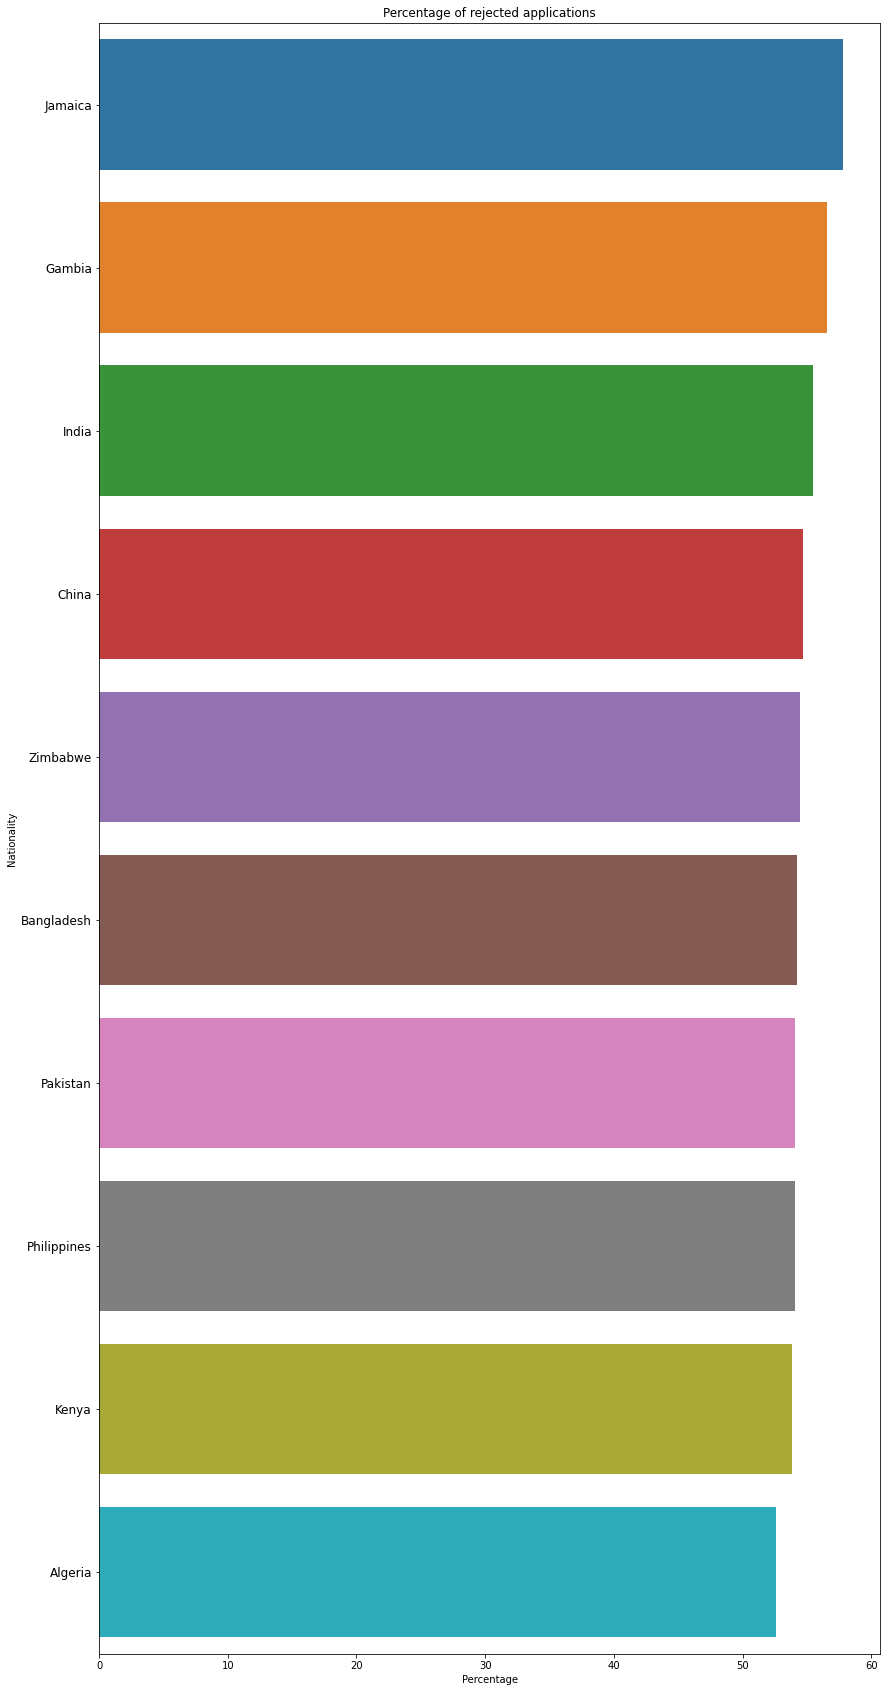

In [33]:
pivoted_df_country_pyramid = df_country_pyramid.pivot('Nationality:', 'Decision label:', 'counts').rename_axis(None, axis=1).reset_index()
pivoted_df_country_pyramid['Rejected pc'] = 100* (abs(pivoted_df_country_pyramid['Rejected'])/(pivoted_df_country_pyramid['Accepted']+abs(pivoted_df_country_pyramid['Rejected'])))
print(pivoted_df_country_pyramid.sort_values(by=['Rejected pc'], ascending=False))

# Plot the percentage of accepted applications per nationality
plt.figure(figsize=(14,30))
sns.barplot(data = pivoted_df_country_pyramid.sort_values(by=['Rejected pc'], ascending = False)[:10], x = 'Rejected pc', y = 'Nationality:')

# Decorations
plt.xlabel("Percentage")
plt.ylabel("Nationality")
plt.yticks(fontsize=12)
plt.title('Percentage of rejected applications')

           Judge     Label  counts
563       Hanson  Rejected    -535
760         Juss  Rejected    -393
256   Clive Lane  Rejected    -374
1221      Pickup  Rejected    -348
845         Lane  Rejected    -318
...          ...       ...     ...
843         Lane  Accepted     289
1309     Rintoul  Accepted     294
534        Grubb  Accepted     364
758         Juss  Accepted     393
166        Bruce  Accepted     431

[339 rows x 3 columns]


<AxesSubplot:xlabel='counts', ylabel='Judge'>

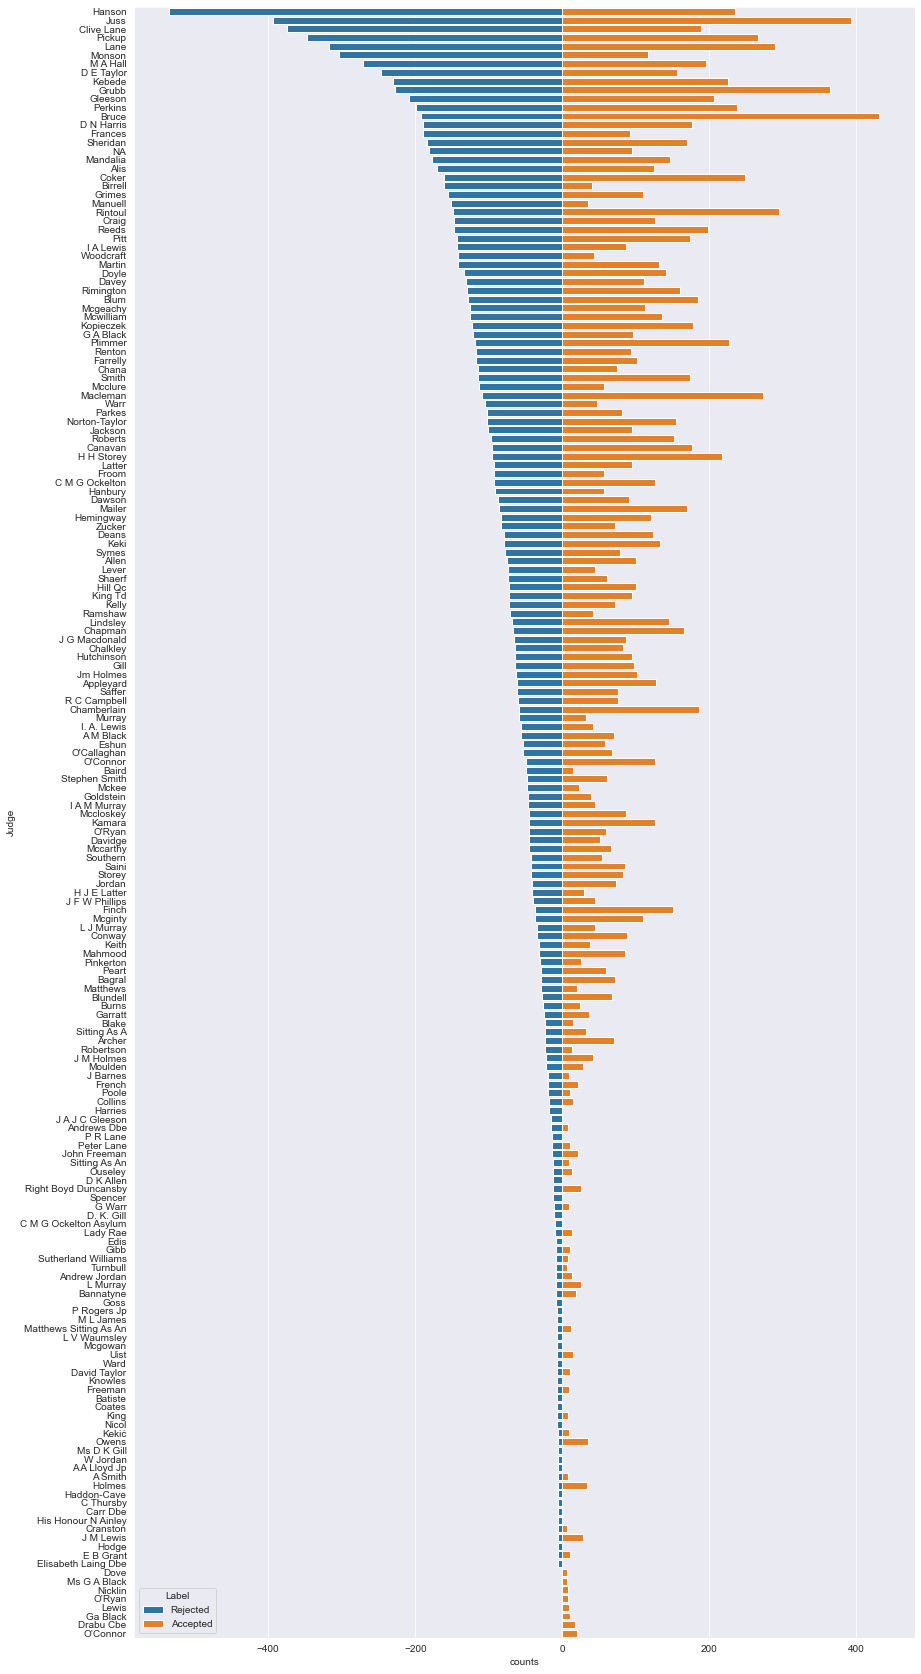

In [353]:
judges = []

for r in zip(df['Judges:'], df['Decision label:']):
        judges.append((r[0], r[1]))

judge = []
label = []

for i in judges:
    for x in i[0]:
        judge.append(x)
        label.append(i[1])

df_judges = pd.DataFrame(list(zip(judge, label)), columns =['Judge', 'Label'])
df_judges

# Chart
df_judges = df_judges.groupby(['Judge', 'Label']).size().reset_index(name = 'counts')


df_judges = df_judges[df_judges['Label'] != 'Neutral']

# Delete if counts in less than 10
df_judges = df_judges[df_judges['counts'] > 5]

df_judges['counts'] = np.where(df_judges['Label'] == 'Rejected', df_judges['counts'] * -1, df_judges['counts'])
df_judges = df_judges.sort_values(by=['counts'])
print(df_judges)

plt.figure(figsize=(14,30))
sns.barplot(data = df_judges, x = 'counts', y = 'Judge', hue = 'Label', orient = 'horizontal', dodge = False)



In [368]:
# TO DO

judges = []

# top 10 judges and their court 
for r in zip(df['Judges:'], df['Heard at:']):
        judges.append((r[0], r[1]))

judge = []
court = []

for i in judges:
    for x in i[0]:
        judge.append(x)
        court.append(i[1])

df_top_judges = pd.DataFrame(list(zip(judge, court)), columns =['Judge', 'Court'])


df_top_judges = df_top_judges.groupby(['Judge']).size().reset_index(name = 'counts')
top_judge = df_top_judges.sort_values(by = ['counts'], ascending = False)

top_judge[:500]

# Number of judges
#len(top_judge)


,Judge,counts
623,Macleman,1009
517,Juss,825
383,Hanson,821
366,Grubb,758
115,Bruce,715
...,...,...
18,A Foster,2
646,Mcall,2
609,M S W Hoyle,2
610,M Shrimpton,2


In [340]:
df_judges.head(1000)

# get longest string index from column
indx = df_judges["Judge"].str.len().idxmax()

# get longest string value
df_judges["Judge"][indx]



'Matthews Sitting As An'

           Judge  Accepted  Rejected  Accepted pc
144        Owens      35.0       6.0    85.365854
78        Holmes      33.0       6.0    84.615385
88     J M Lewis      28.0       6.0    82.352941
52         Finch     150.0      37.0    80.213904
25   Chamberlain     186.0      59.0    75.918367
..           ...       ...       ...          ...
147     P R Lane       NaN      14.0          NaN
148  P Rogers Jp       NaN       8.0          NaN
175      Spencer       NaN      13.0          NaN
182     W Jordan       NaN       6.0          NaN
183         Ward       NaN       7.0          NaN

[187 rows x 4 columns]


Text(0.5, 1.0, 'Percentage of accepted applications')

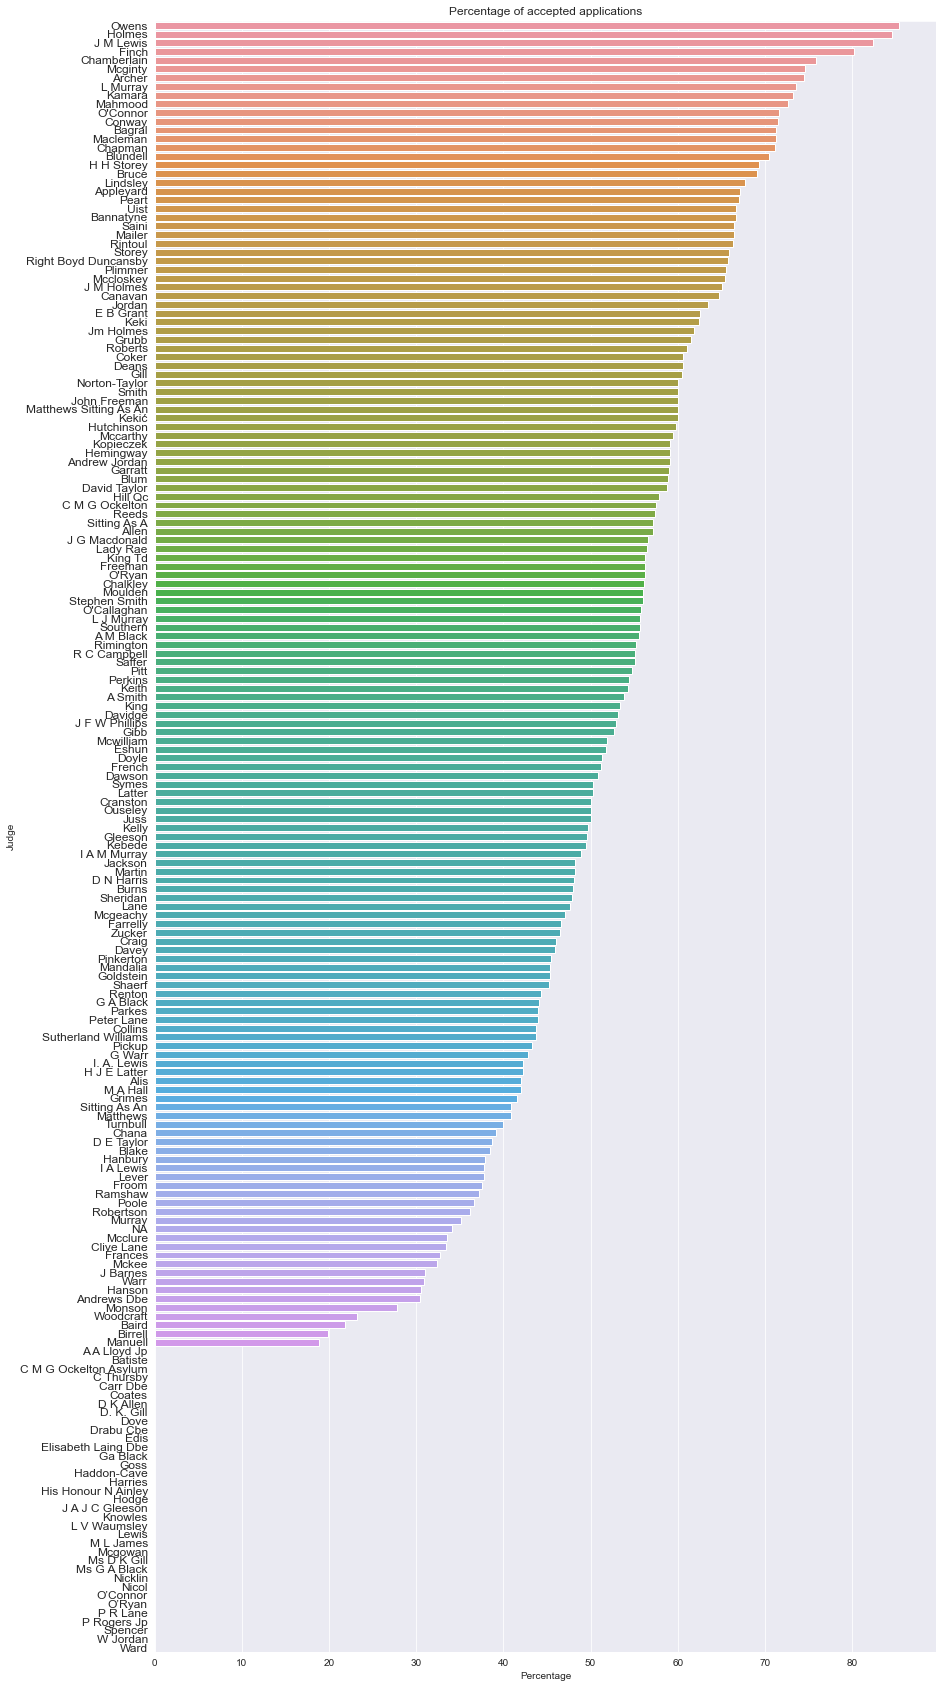

In [227]:

pivoted_df_judges_pyramid = df_judges.pivot('Judge', 'Label', 'counts').rename_axis(None, axis=1).reset_index()
pivoted_df_judges_pyramid['Accepted pc'] = 100* (pivoted_df_judges_pyramid['Accepted']/(pivoted_df_judges_pyramid['Accepted']+abs(pivoted_df_judges_pyramid['Rejected'])))
print(pivoted_df_judges_pyramid.sort_values(by=['Accepted pc'], ascending=False))

# Plot the percentage of accepted applications per nationality
plt.figure(figsize=(14,30))
sns.barplot(data = pivoted_df_judges_pyramid.sort_values(by=['Accepted pc'], ascending=False), x = 'Accepted pc', y = 'Judge')

# Decorations
plt.xlabel('Percentage')
plt.ylabel('Judge')
plt.yticks(fontsize = 12)
plt.title('Percentage of accepted applications')

In [230]:
#df_country_pyramid = df['Nationality:'].value_counts().rename_axis('Nationality').reset_index(name='counts')
df_solicitor_pyramid = df.groupby(['Appellant entity:', 'Decision label:']).size().reset_index(name = 'counts')
print(df_solicitor_pyramid[100:120])
df_solicitor_pyramid = df_solicitor_pyramid[df_solicitor_pyramid['Decision label:'] != 'Neutral']
df_solicitor_pyramid['counts'] = np.where(df_solicitor_pyramid['Decision label:'] == 'Rejected', df_solicitor_pyramid['counts'] * -1, df_solicitor_pyramid['counts'])
df_solicitor_pyramid = df_solicitor_pyramid.sort_values(by=['counts'])

df_solicitor_pyramid

pivoted_df_solicitor_pyramid = df_solicitor_pyramid.pivot('Solicitor', 'Label', 'counts').rename_axis(None, axis=1).reset_index()
pivoted_df_solicitor_pyramid['Accepted pc'] = 100 * (pivoted_df_solicitor_pyramid['Accepted']/(pivoted_df_solicitor_pyramid['Accepted']+abs(pivoted_df_solicitor_pyramid['Rejected'])))
print(pivoted_df_solicitor_pyramid.sort_values(by = ['Accepted pc'], ascending = False))

# Plot the percentage of accepted applications per nationality
plt.figure(figsize=(14,30))
sns.barplot(data = pivoted_df_solicitor_pyramid.sort_values(by=['Accepted pc'], ascending=False), x = 'Accepted pc', y = 'Solicitor')

# Decorations
plt.xlabel('Percentage')
plt.ylabel('Solicitor')
plt.yticks(fontsize = 12)
plt.title('Percentage of accepted applications')



                Appellant entity: Decision label:  counts
100              adams solicitors        Rejected       1
101           adamsons solicitors        Accepted       1
102       addison khan solicitors        Accepted       5
103       addison khan solicitors        Rejected       4
104       adel jibs co solicitors        Rejected       1
105                          aden        Rejected       1
106        aden and co solicitors         Neutral       1
107        aden and co solicitors        Rejected       1
108            aden co solicitors        Accepted       5
109            aden co solicitors        Rejected       6
110       aden company solicitors        Accepted       1
111               aden solicitors        Rejected       1
112          adesemowo solicitors        Accepted       1
113            adh law solicitors        Accepted       1
114            adh law solicitors        Rejected       1
115                adl solicitors        Accepted       1
116      adona

,Appellant entity:,Decision label:,counts
0,,Accepted,106
2,,Rejected,-132
3,Home Office,Accepted,2358
5,Home Office,Rejected,-2824
6,a a solicitors,Accepted,2
...,...,...,...
4995,ziadies solicitors,Rejected,-4
4996,zureil solicitors,Accepted,1
4997,zuriel solicitors,Accepted,2
4998,zuriel solicitors,Rejected,-1


print(data[10481])

# 3. Charts



In [245]:
solicitors = list(set(df['Appellant entity:']))

solicitors = [str(s) for s in solicitors]
sort = sorted(solicitors)
sort


['',
 'Home Office',
 'a a solicitors',
 'a a solicitors llp',
 'a and p solicitors',
 'a b james solicitors',
 'a bajwa and co solicitors',
 'a bajwa co solicitors',
 'a billie law',
 'a c gilead solicitors',
 'a de ruano legal advisors',
 'a farsi interpreter',
 'a g i solicitors',
 'a h law limited',
 'a h solicitors',
 'a i law chambers',
 'a j bradley co solicitors',
 'a j o solicitors',
 'a j paterson solicitor',
 'a j paterson solicitors',
 'a j solicitors',
 'a k law chambers',
 'a k solicitors',
 'a k solicitors llp',
 'a m law associates',
 'a o associates',
 'a o associates solicitors',
 'a p solicitors',
 'a r immigration services on march',
 'a s h immigration services',
 'a seelhoff solicitors',
 'a solicitors',
 'a syed ali',
 'a vincent solicitors',
 'a w s solicitors',
 'a y j solicitors',
 'aa and co harrison mr m karnik instructed by fadiga and co',
 'aa co solicitors',
 'aa immigration lawyers',
 'aa solicitors',
 'aamir zane solicitors',
 'aaron ace solicitors',
 '

              String
count   35270.000000
mean     2603.519819
std      3405.034024
min         0.000000
25%      1124.000000
50%      1866.000000
75%      3002.000000
max    135703.000000


Text(0.5, 1.0, 'Labels in court rulings')

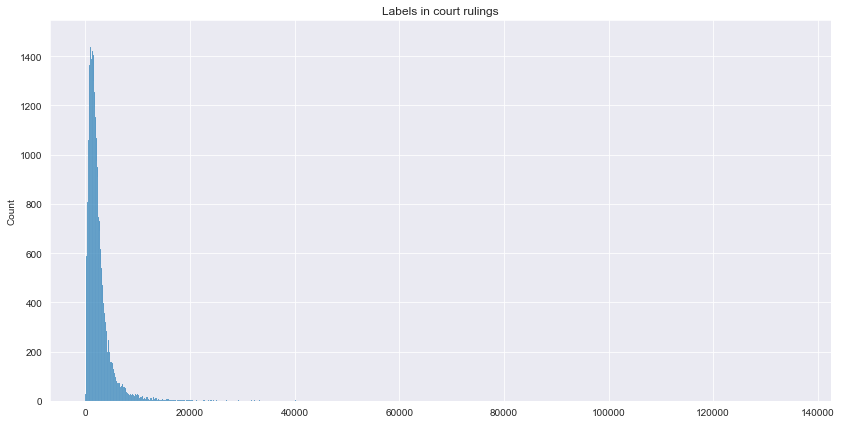

In [102]:
# Original texts deleting duplicated rulings
orig_texts = df['String'].unique().tolist()

# Issue field length count statisticals values and histogram with KDE
#document_lengths = [len(re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', x)) for x in orig_texts]

document_lengths = [len(x.split()) for x in orig_texts]

print(pd.DataFrame(document_lengths, columns = ['String']).describe())

#sns.set_style(style="darkgrid")
#sns.displot(document_lengths, kde = True, bins = 40, height = 5, aspect = 2)
#plt.title('Document length')

# Plot the number of rulings per year
plt.figure(figsize=(14,7))
sns.histplot(data = document_lengths)
plt.title('Labels in court rulings')



          Decision:
count  3.527000e+04
mean   1.785578e+04
std    2.448509e+04
min    5.000000e+00
25%    7.877250e+03
50%    1.273000e+04
75%    2.030275e+04
max    1.249939e+06


Text(0.5, 1.0, 'Decision length')

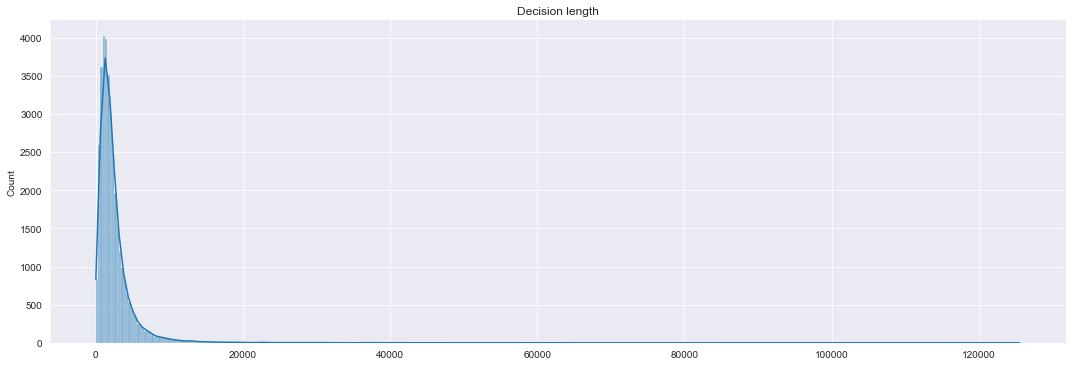

In [20]:
# Original texts deleting duplicated issues
orig_decisions = df['Decision:'].tolist()

# Issue field length count statisticals values and histogram with KDE
decision_lengths = [len(x) for x in orig_texts]

print(pd.DataFrame(decision_lengths, columns = ['Decision:']).describe())

sns.set_style(style="darkgrid")

sns.displot(document_lengths, kde = True, bins = 400, height = 5, aspect = 3)
plt.title('Decision length')


In [103]:
print(np.mean(document_lengths))
print(np.max(document_lengths))
print(np.min(document_lengths))

test_str = 'a la casa'
word_cnt = len(test_str.split())

test = [len(re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', x)) for x in test_str]
test
word_cnt


2603.5198185426707
135703
0


3